In [26]:
import numpy as np
import scipy.special as sc
import sys
sys.path.append("../code/")
import thinkbayes
import thinkplot

In [97]:
class Beta(object):
    def __init__(self,a,b):
        self.a=a
        self.b=b
    
    def Mean(self):  # expectation of beta distribution
        return self.a/(self.a+self.b)
    
    def Update(self,data):  # 推导：共轭分布
        a,b=data
        self.a+=a
        self.b+=b
        
    def MakePmf(self):
        pmf=thinkbayes.Pmf()
        for i in np.linspace(0,1,num=51):
            prob=sc.beta(self.a,self.b)
            pmf.Set(i,prob)
        pmf.Normalize()
        return pmf
        
class Dirichlet(object):
    def __init__(self,n):
        self.n=n
        self.params=np.ones(n, dtype=np.int)
    
    def MarginalBeta(self,i):
        return Beta(self.params[i],self.params.sum()-self.params[i])
#         return sc.beta(self.params[i],self.params.sum()-self.params[i])

    def Update(self,data):
        m=len(data)
        if len(self.params)>=m:
            self.params[:m]+=data
    
    def Likelihood(self,data):
        m=len(data)
        if self.n<m:
            return 0
        x=data
        p=np.random.gamma(self.params)  # numpy.random.gamma([3,2,1])=array([0.29825935, 1.71732447, 0.98703398])
        p=p/p.sum()
        q=p[:m]**x  # 随机选择一组种群比例
        return q.prod()
    
    def __gt__(self,b):
        if self.n > b.n:
            return True
        else:
            return False

## Given the number of species, estimate the propotion of each species

In [98]:
dirichlet=Dirichlet(3)
beta=dirichlet.MarginalBeta(1)
print(beta.Mean())

0.3333333333333333


In [99]:
dirichlet.Update([3,2,1])
for i in range(3):  # 3 categories
    beta=dirichlet.MarginalBeta(i)
    print(i,beta.Mean())

0 0.4444444444444444
1 0.3333333333333333
2 0.2222222222222222


## Estimate the number of species

In [163]:
class Species(thinkbayes.Suite):
    def __init__(self,ns):
        hypos=[Dirichlet(n) for n in ns]
        thinkbayes.Suite.__init__(self,hypos)
    
    def Update(self,data):
        thinkbayes.Suite.Update(self,data)
        for hypo in self.Values():
            hypo.Update(data)
    
    def Likelihood(self,data,hypo):
        dirichlet=hypo
        like=0
        for i in range(500):
            like+=dirichlet.Likelihood(data)
        return like
    
    def DistOfN(self):
        pmf=thinkbayes.Pmf()
        for hypo,prob in self.Items():
            pmf.Set(hypo.n,prob)
        return pmf
    

<__main__.Dirichlet object at 0x129bd2358> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2390> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2e48> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2be0> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2ef0> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd25c0> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2978> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2c88> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2240> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2780> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2d68> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2b38> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd29b0> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2128> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd2dd8> 0.037037037037037035
<__main__.Dirichlet object at 0x129bd204

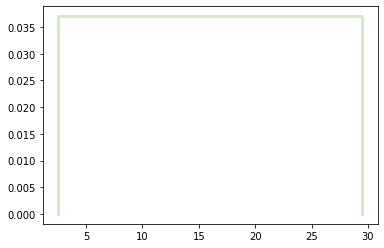

In [164]:
ns=range(3,30)
suite=Species(ns)
suite.Print()
thinkplot.Pmf(suite.DistOfN())

<__main__.Dirichlet object at 0x129bd2358> 0.0
<__main__.Dirichlet object at 0x129bd2390> 0.0
<__main__.Dirichlet object at 0x129bd2e48> 0.0
<__main__.Dirichlet object at 0x129bd2be0> 0.0
<__main__.Dirichlet object at 0x129bd2ef0> 0.0
<__main__.Dirichlet object at 0x129bd25c0> 0.0
<__main__.Dirichlet object at 0x129bd2978> 0.0
<__main__.Dirichlet object at 0x129bd2c88> 0.0
<__main__.Dirichlet object at 0x129bd2240> 0.0
<__main__.Dirichlet object at 0x129bd2780> 0.0
<__main__.Dirichlet object at 0x129bd2d68> 0.0
<__main__.Dirichlet object at 0x129bd2b38> 0.0
<__main__.Dirichlet object at 0x129bd29b0> 0.0
<__main__.Dirichlet object at 0x129bd2128> 0.0
<__main__.Dirichlet object at 0x129bd2dd8> 0.0
<__main__.Dirichlet object at 0x129bd2048> 0.999257007753229
<__main__.Dirichlet object at 0x129bd2e10> 0.0007347667502649581
<__main__.Dirichlet object at 0x129bd2ac8> 8.224824431487884e-06
<__main__.Dirichlet object at 0x129bd2eb8> 6.720745452136337e-10
<__main__.Dirichlet object at 0x129bd2d

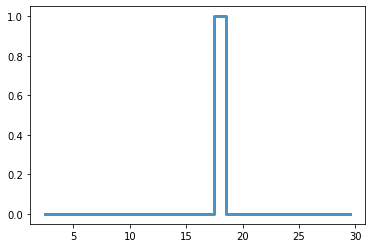

In [165]:
for i in range(5,20):
#     suite.Update([1,2,3,4,5,6,7,8,9])
    suite.Update([10 for x in range(1,i)])
suite.Print()
thinkplot.Pmf(suite.DistOfN())